In [39]:
from google.colab import files
uploaded = files.upload()  # Select Titanic-Dataset.csv file to upload


Saving Titanic-Dataset.csv to Titanic-Dataset.csv


In [40]:
import pandas as pd

# Load the Titanic dataset (this is after uploading it to Colab)
titanic_df = pd.read_csv('Titanic-Dataset.csv')  # The name should match your uploaded file

# Display the first few rows to verify
titanic_df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Step 1: Sorting and Subsetting

Problem 1 - Sorting

In [41]:
# Task 1: Create a DataFrame called 'fare' containing only the Fare column
fare = titanic_df[['Fare']]
print(fare.head())

# Task 2: Create a DataFrame called 'class_age' containing Pclass and Age columns
class_age = titanic_df[['Pclass', 'Age']]
print(class_age.head())

# Task 3: Create a DataFrame called 'survived_gender' containing Survived and Sex columns
survived_gender = titanic_df[['Survived', 'Sex']]
print(survived_gender.head())


      Fare
0   7.2500
1  71.2833
2   7.9250
3  53.1000
4   8.0500
   Pclass   Age
0       3  22.0
1       1  38.0
2       3  26.0
3       1  35.0
4       3  35.0
   Survived     Sex
0         0    male
1         1  female
2         1  female
3         1  female
4         0    male


Problem 2 - Subsetting

In [42]:
# Task 1: Filter the Titanic dataset for cases where the passenger’s fare is greater than 100
fare_gt_100 = titanic_df[titanic_df['Fare'] > 100]
print(fare_gt_100)

# Task 2: Filter the Titanic dataset for cases where the passenger’s class (Pclass) is 1
first_class = titanic_df[titanic_df['Pclass'] == 1]
print(first_class)

# Task 3: Filter the Titanic dataset for cases where the passenger’s age is less than 18 and the passenger is female
female_under_18 = titanic_df[(titanic_df['Age'] < 18) & (titanic_df['Sex'] == 'female')]
print(female_under_18)

# Task 4: Filter the Titanic dataset for passengers whose Embarked port is either "C" (Cherbourg) or "S" (Southampton)
embarked_c_or_s = titanic_df[titanic_df['Embarked'].isin(['C', 'S'])]
print(embarked_c_or_s)

# Task 5: Filter the Titanic dataset for passengers whose Pclass is in the list [1, 2] (indicating first or second class)
first_second_class = titanic_df[titanic_df['Pclass'].isin([1, 2])]
print(first_second_class)


     PassengerId  Survived  Pclass  \
27            28         0       1   
31            32         1       1   
88            89         1       1   
118          119         0       1   
195          196         1       1   
215          216         1       1   
258          259         1       1   
268          269         1       1   
269          270         1       1   
297          298         0       1   
299          300         1       1   
305          306         1       1   
306          307         1       1   
307          308         1       1   
311          312         1       1   
318          319         1       1   
319          320         1       1   
325          326         1       1   
332          333         0       1   
334          335         1       1   
337          338         1       1   
341          342         1       1   
373          374         0       1   
377          378         0       1   
380          381         1       1   
390         

Step 2: Exploratory Data Analysis Practice Exercise

Question 1: Which passenger had the highest fare paid relative to their age?

In [43]:
# Task 1: Add a column "fare per year" containing Fare/Age
titanic_df['fare_per_year'] = titanic_df['Fare'] / titanic_df['Age']

# Task 2: Subset rows where fare_per_year is higher than 5
high_fare_age = titanic_df[titanic_df['fare_per_year'] > 5]

# Task 3: Sort by fare_per_year in descending order
high_fare_age_sorted = high_fare_age.sort_values(by='fare_per_year', ascending=False)

# Task 4: Select only the Name and fare_per_year columns of high_fare_age_sorted and save the result as 'result'
result_high_fare = high_fare_age_sorted[['Name', 'fare_per_year']]
print(result_high_fare.head())


                                Name  fare_per_year
305   Allison, Master. Hudson Trevor     164.728261
297     Allison, Miss. Helen Loraine      75.775000
386  Goodwin, Master. Sidney Leonard      46.900000
164     Panula, Master. Eino Viljami      39.687500
183        Becker, Master. Richard F      39.000000


Question 2: Which adult male passenger (age ≥ 18 and Sex is ‘male’) paid the highest fare relative to their class?

In [44]:
# Task 1: Add a column "fare per class" containing Fare/Pclass
titanic_df['fare_per_class'] = titanic_df['Fare'] / titanic_df['Pclass']

# Task 2: Subset rows for male passengers aged >= 18
adult_males = titanic_df[(titanic_df['Sex'] == 'male') & (titanic_df['Age'] >= 18)]

# Task 3: Sort adult_males by descending fare_per_class
adult_males_sorted = adult_males.sort_values(by='fare_per_class', ascending=False)

# Task 4: Select only the Name, Age, and fare_per_class columns of adult_males_sorted and save the result as 'result'
result_adult_males = adult_males_sorted[['Name', 'Age', 'fare_per_class']]
print(result_adult_males.head())


                                   Name   Age  fare_per_class
737              Lesurer, Mr. Gustave J  35.0        512.3292
679  Cardeza, Mr. Thomas Drake Martinez  36.0        512.3292
438                   Fortune, Mr. Mark  64.0        263.0000
27       Fortune, Mr. Charles Alexander  19.0        263.0000
118            Baxter, Mr. Quigg Edmond  24.0        247.5208


Step 3: Exploratory Data Analysis with Group-by Method

Question 1: What percent of the total fare revenue came from each passenger class?

In [45]:
# Task 1: Calculate the total Fare paid across all passengers in the Titanic dataset
total_fare = titanic_df['Fare'].sum()

# Task 2: Subset for first class passengers (Pclass is 1) and calculate their total fare
first_class_fare = titanic_df[titanic_df['Pclass'] == 1]['Fare'].sum()

# Task 3: Subset for second class passengers (Pclass is 2) and calculate their total fare
second_class_fare = titanic_df[titanic_df['Pclass'] == 2]['Fare'].sum()

# Task 4: Subset for third class passengers (Pclass is 3) and calculate their total fare
third_class_fare = titanic_df[titanic_df['Pclass'] == 3]['Fare'].sum()

# Task 5: Calculate the proportion of fare revenue by class
first_class_pct = (first_class_fare / total_fare) * 100
second_class_pct = (second_class_fare / total_fare) * 100
third_class_pct = (third_class_fare / total_fare) * 100

# Display the results
print(f"First Class Fare Percentage: {first_class_pct}%")
print(f"Second Class Fare Percentage: {second_class_pct}%")
print(f"Third Class Fare Percentage: {third_class_pct}%")


First Class Fare Percentage: 63.349287718996564%
Second Class Fare Percentage: 13.24962855496507%
Third Class Fare Percentage: 23.401083726038365%


Question 2: What percent of the total number of passengers on the Titanic belonged to each age group?

In [46]:
# Task 1: Create a new column 'age_group' that categorizes passengers into "child", "adult", and "senior"
titanic_df['age_group'] = pd.cut(titanic_df['Age'], bins=[0, 18, 64, 100], labels=['child', 'adult', 'senior'])

# Task 2: Calculate the total number of passengers on the Titanic
total_passengers = titanic_df.shape[0]

# Task 3: Count the number of passengers in each age group
age_group_counts = titanic_df['age_group'].value_counts()

# Task 4: Calculate the proportion of passengers in each age group
age_group_percentage = (age_group_counts / total_passengers) * 100

# Display the proportions
print(age_group_percentage)


age_group
adult     63.299663
child     15.600449
senior     1.234568
Name: count, dtype: float64


Step 4: Data Visualization (Optional)

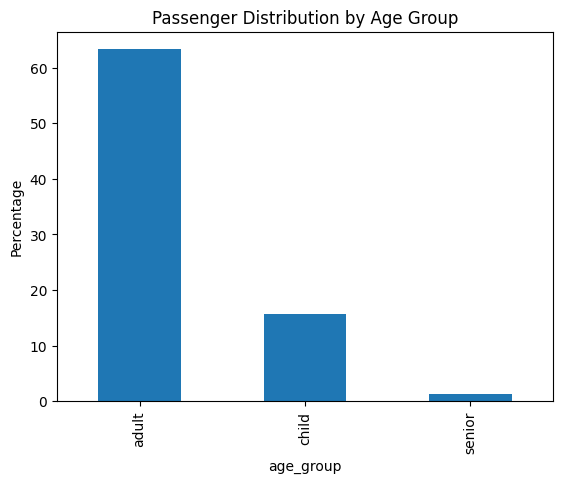

In [47]:
import matplotlib.pyplot as plt

# Example: Bar plot for the distribution of passengers across age groups
age_group_percentage.plot(kind='bar', title="Passenger Distribution by Age Group")
plt.ylabel("Percentage")
plt.show()
